# Lezione 9 - Esercizi

## ESERCIZIO 9.1
Scrivi un programma che generi numeri pseudo-casuali distribuiti secondo un'esponenziale e li immetta in una lista

In [11]:
# Librerie
from random_methods import *
from matplotlib import pyplot as plt
import scienceplots

In [12]:
# Variabili
t_0: float = 1.5
N: int = 10000
sample_exp: list[float] = gen_inverse_exponential_CDF(t_0, N)

## ESERCIZIO 9.2
Rappresenta la distribuzione dei valori in un istogramma e stampalo a schermo

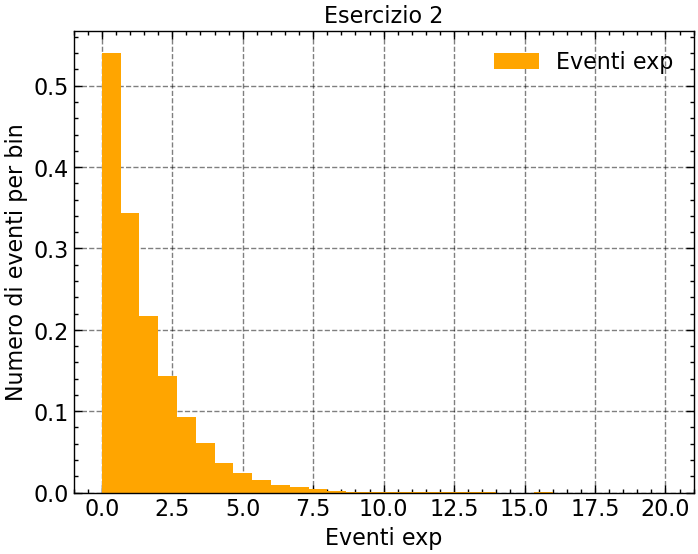

In [13]:
# Plot
plt.style.use(["science", "notebook"])
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.set_title("Esercizio 2")
ax.set_xlabel("Eventi exp")
ax.set_ylabel("Numero di eventi per bin")

# Istogramma
x_min: float = 0.0
x_max: float = 20.0
n_bins: int = sturges(len(sample_exp))
bin_edges = np.linspace(x_min, x_max, n_bins)

ax.hist(sample_exp, bin_edges, color = "orange", label = "Eventi exp", density = True)
ax.legend()

plt.show()

## ESERCIZIO 9.3
Scrivi un programma che plotti una PDF esponenziale con parametro t_0 fissato

In [14]:
def exp_pdf(x: float, t_0: float) -> float:
    return (1.0 / t_0) * np.exp((-1.0) * (x / t_0))

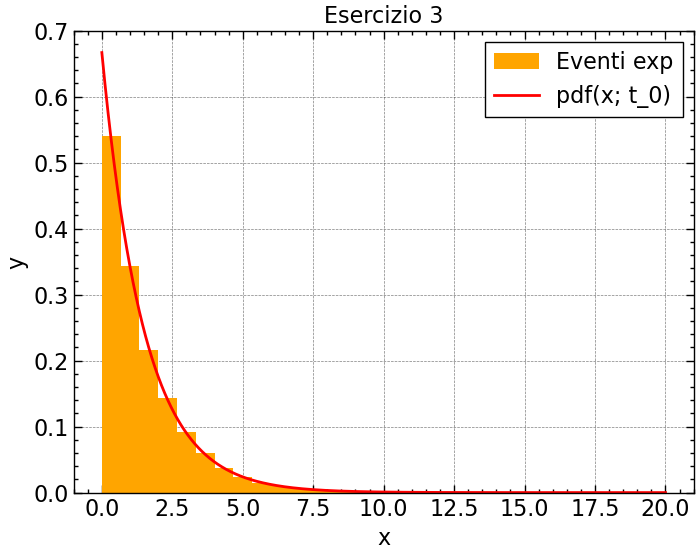

In [15]:
# Variabili
x_coord = np.linspace(x_min, x_max, 100000)

# Plot
plt.style.use(["science", "notebook", "grid"])
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.set_title("Esercizio 3")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.hist(sample_exp, bin_edges, color = "orange", label = "Eventi exp", density = True)
ax.plot(x_coord, exp_pdf(x_coord, t_0), color = "red", label = "pdf(x; t_0)")
ax.legend(fancybox = False, edgecolor = "black")

plt.show()

## Esercizio 9.4
Scrivi una funzione `likelihood` che calcoli la funzione likelihood al variare del parametro $ t_0 $, per il sample generato nell'esercizio 1. Qual è la dipendenza del risultato dal numero di eventi nel campione?

In [16]:
def likelihood(f, sample: list[float], par: float) -> float:

    prod: float = 1.0    

    for i in range(len(sample)):
        prod *= f(sample[i], par)

    return prod

In [17]:
print(f"Likelihood for t_0 = {t_0}: {likelihood(exp_pdf, sample_exp, t_0)}")

Likelihood for t_0 = 1.5: 0.0


## Esercizio 9.5
Scrivi una funzione loglikelihood che calcoli il logaritmo della likelihood al variare del parametro $ t_0 $, per il sample generato nell'esercizio 1.

In [24]:
def loglikelihood(f, sample: list[float], par: float) -> float:

    sum: float = 0.0

    for i in range(len(sample)):
        if f(sample[i], par) > 0.0:
            sum += np.log(f(sample[i], par))

    return sum

In [19]:
print(f"Loglikelihood for t_0 = {t_0}: {likelihood(exp_pdf, sample_exp, t_0)}")

Loglikelihood for t_0 = 1.5: 0.0


## Esercizio 9.6
Studia il comportamento della funzione loglikelihood al variare del numero di eventi del campione

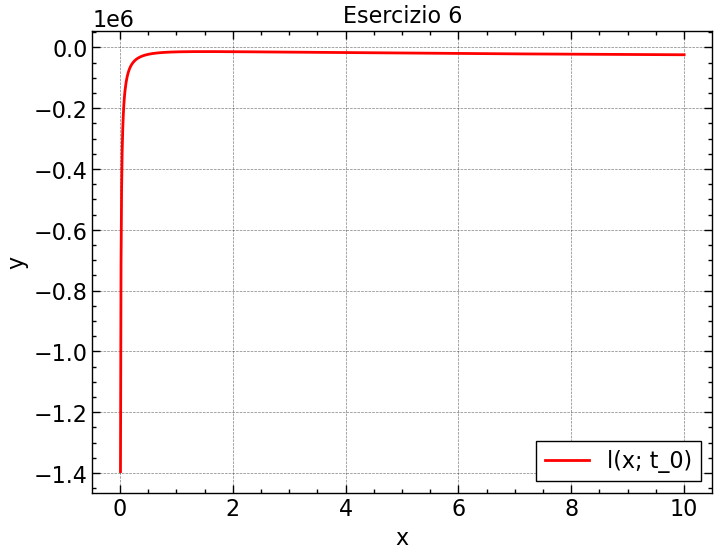

In [22]:
# Variabili
x_min: float = 0.01
x_max: float = 10.0
x_coord = np.linspace(x_min, x_max, 1000)
ll = np.arange(0.01, len(x_coord))

for i in range(len(x_coord)):
    ll[i] = loglikelihood(exp_pdf, sample_exp, x_coord[i])

# Plot
plt.style.use(["science", "notebook", "grid"])
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.set_title("Esercizio 6")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.plot(x_coord, ll, color = "red", label = "l(x; t_0)")
ax.legend(fancybox = False, edgecolor = "black")